<Body>   
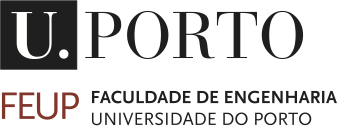   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Apr. 2022

---


In [14]:
!jupyter nbconvert --to html /content/Project #1_Submission_.ipynb_P1_A4_G10.ipynb

[NbConvertApp] WARNING | pattern '/content/Project' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    

# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform. 

**Deadlines:** Present you work (and answer questions) on the week of **April 18** in your corresponding practical class. Upload the files until 23:59 of **April 28, 2022**.


---



# **Identification**

* **Group:** A4_G10
* **Name:** Gabriel Moura Fernandes
* **Student Number:** 201806109

* **Name:** Thaidy Deguchi
* **Student Number:** 201802575


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [1]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
  inflating: ./data-set.csv          
  inflating: ./__MACOSX/._data-set.csv  


In [2]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df.head()
#df

# By convention, values of zero mean no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,0.0,-3.946339,-2.912177,0.711051,-0.307325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.000000,0.000000,0.678366,-0.308563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.000000,0.000000,0.677682,-0.285029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.000000,0.000000,0.648523,-0.293170,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.000000,0.000000,0.644965,-0.277222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!
 
### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*
\begin{align*}
\begin{bmatrix}
x_{t+1} \\
b_{x,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t+1} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}

*y-direction*
\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t+1} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1** 
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [3]:
import numpy as np
import random as rd
from numpy import * 
import matplotlib.pyplot as plt
from numpy.linalg import inv 
from numpy.linalg import det

#Table Values
time = df["time"].values  #len(time)=500
x = df["x"].values        #len(x,y,vx,vy)=500
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values

#Debug prints

#print(time) 
#print(x)
#print(y)
#print(vx)
#print(vy)


In [4]:
#Functions of Kaman Filter, same as NB#5

def kf_predict(X, P, A, Q, B, U): 
    """      
      X : The mean state estimate of the previous step (k−1) - shape(m,1) 
      P : The state covariance of previous step (k−1) - shape(m,m) 
      A : The transition  matrix - shape(m,m) 
      Q : The process noise covariance matrix - shape(m,m) 
      B : The input effect matrix - shape(p, m) 
      U : The control input - shape(q,1)
    """ 
    X = A @ X + B * U
    P = A @ P @ A.T + Q 
    return (X,P) 

def kf_update(X, P, Y, H, R): 
    """      
      K  : the Kalman Gain matrix 
      IS : the Covariance or predictive mean of Y  
    """
    IS = H @ P @ H.T + R  
    K = P @ H.T @ inv(IS) 
    X = X + K @ (Y- H @ X) 
    P = P - K @ IS @ K.T 
#   P = P - K @ H @ P 
    return (X,P)

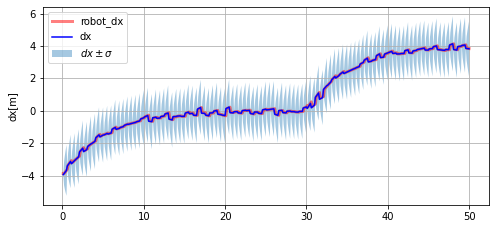

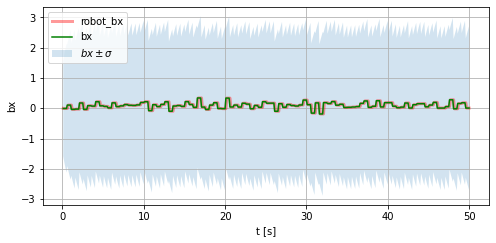

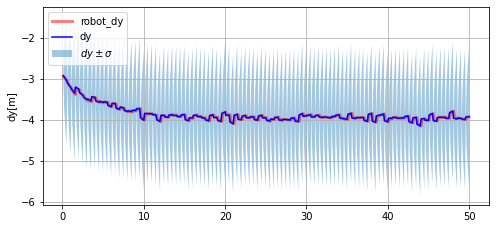

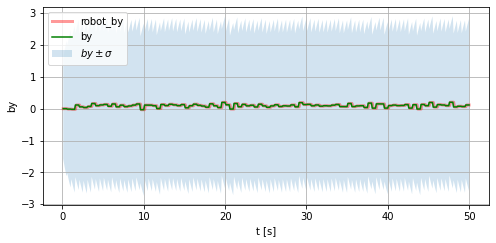

In [5]:
#Initial Values and Constant Values 

# sample time
h = 0.1;

# state matrix
A = np.array( [ [ 1.0, h ],
                [ 0.0, 1.0] ] )         


# input effect matrix
B = np.array( [ [h],
                [0] ] )  


# meas matrix
H = np.array( [ [ 1.0, 0.0 ] ] )  


P_x = np.array( [ [2.0, 0.0],
                  [0.0, 2.0] ] ) #The state initial covariance of x


P_y = np.array( [ [2.0, 0.0],
                  [0.0, 2.0] ] ) #The state initial covariance of y


Rx = np.array( [ [0.0] ] ) #Rx input variance of x, initial value, its constant at the beggining

Ry = np.array( [ [0.0] ] ) #Ry input variance of y, initial value, its constant at the beggining


Qx = np.array(np.eye(2) * 0.5) #The process noise covariance matrix x


Qy = np.array(np.eye(2) * 0.5) #The process noise covariance matrix y


####################################################################################################################################################
# Process of x

#Initial State of x
X_x = np.array( [ [x[0]], 
                  [0] ]  ) 


##########################################################################################################################################################
# Process of y

#Initial State of y
X_y = np.array( [ [y[0]], 
                  [0] ]  ) 

##########################################################################################################################################################
t = 0
t_time = []      

#This code below until "Kaman Filter Loop" is for plotting 
#---------------------------------------------------------------------------------------

dx_time = []      # position of robot over time (mean)
bx_time = []      # bias of robot over time (mean)

dx_sd_time = []   # position of robot over time (std_dev)
bx_sd_time = []   # bias of robot over time (std_dev)
dx_up_time = []   # d mean + one std_dev
dx_dn_time = []   # d mean - one std_dev
bx_up_time = []   # v mean + one std_dev
bx_dn_time = []   # v mean - one std_dev

dx_robot = x[0]
vx_robot = vx[0]
bx_robot = 0
bias_x = 0

robot_dx_time = []   # real robot position
robot_bx_time = []   # real robot bias
robot_vx_time = []   # real robot velocity (this is the input of the system)

#--------------------------------------------------------------------------------------

dy_time = []      # position of robot over time (mean)
by_time = []      # bias of robot over time (mean)

dy_sd_time = []   # position of robot over time (std_dev)
by_sd_time = []   # bias of robot over time (std_dev)
dy_up_time = []   # d mean + one std_dev
dy_dn_time = []   # d mean - one std_dev
by_up_time = []   # v mean + one std_dev
by_dn_time = []   # v mean - one std_dev

dy_robot = y[0]
vy_robot = vy[0]
by_robot = 0
bias_y = 0

robot_dy_time = []   # real robot position
robot_by_time = []   # real robot bias
robot_vy_time = []   # real robot velocity (this is the input of the system)

###################################################################################
#
# Kalman Filter loop
#

N_iter = len(time)                    # implies dt*N_iter seconds
        

#X - Direction 
for i in arange(0, N_iter):
  t += h
  t_time.append(t)

  vx_robot = vx[i]  #update the velocity vector of x
  vy_robot = vy[i]  #update the velocity vector of y

  Ux = np.array([ [vx_robot] ]) #The control input matrix of x
  Uy = np.array([ [vy_robot] ]) #The control input matrix of y


  dx_robot += bx_robot * h + vx_robot * h       # real robot x position                      
  bx_robot = bias_x                             # real robot bias                      
  
  robot_dx_time.append(dx_robot)     #add to robot_dx_time vector the new value of real robot x position
  robot_bx_time.append(bx_robot)     #add to robot_bx_time vector the new value of real robot x bias
  robot_vx_time.append(vx_robot)     #add to robot_vx_time vector the new value of robot velocity x


  dy_robot += by_robot * h + vy_robot * h               # real robot y position   
  by_robot = bias_y                                     # real robot bias 

  robot_dy_time.append(dy_robot)     #add to robot_dy_time vector the new value of real robot y position
  robot_by_time.append(by_robot)     #add to robot_by_time vector the new value of real robot y bias
  robot_vy_time.append(vy_robot)     #add to robot_vy_time vector the new value of robot velocity y 
  

  #X and P are the predicted mean and covariance of the state to the x axis, 
  #respectively, on the time step before seeing the measurement.
  (X_x, P_x) = kf_predict(X_x, P_x, A, Qx, B, Ux)
  bias_x = X_x[1].item() #bias x update

  #X and P are the predicted mean and covariance of the state to the y axis, 
  #respectively, on the time step before seeing the measurement.
  (X_y, P_y) = kf_predict(X_y, P_y, A, Qy, B, Uy)
  bias_y = X_y[1].item() #bias y update



  if i%5==0:            
    #########################################################
    #################### x update ###########################
    #########################################################

    dx_robot = x[i]         #update robot position x axis
    Zx = np.array([ [dx_robot] ])
    #dx_robot = x[i]

    #X and P now are the estimated mean and covariance of the state to the x axis,
    #respectively, on time step after seeing the measurement.
    (X_x, P_x) = kf_update(X_x, P_x, Zx, H, Rx) 

    bias_x = X_x[1].item()                                       
    
    #########################################################
    #################### y update ###########################
    #########################################################

    dy_robot = y[i]   #update robot position y axis
    Zy = np.array([ [dy_robot] ])
    #dy_robot = y[i]

    #X and P now are the estimated mean and covariance of the state to the x axis,
    #respectively, on time step after seeing the measurement.
    (X_y, P_y) = kf_update(X_y, P_y, Zy, H, Ry)
    bias_y = X_y[1].item()     #bias y update


   #This code below help plotting 
  dx_time.append( X_x[0].item() )
  bx_time.append( X_x[1].item() )
    
  dx_sd_time.append( sqrt( P_x[0][0]).item() )
  bx_sd_time.append( sqrt( P_x[1][1]).item() )
    
  dx_up_time.append( X_x[0].item() + sqrt( P_x[0][0]).item() )
  dx_dn_time.append( X_x[0].item() - sqrt( P_x[0][0]).item() )
  bx_up_time.append( X_x[1].item() + sqrt( P_x[1][1]).item() )
  bx_dn_time.append( X_x[1].item() - sqrt( P_x[1][1]).item() )


  dy_time.append( X_y[0].item() )
  by_time.append( X_y[1].item() )
    
  dy_sd_time.append( sqrt( P_y[0][0]).item() )
  by_sd_time.append( sqrt( P_y[1][1]).item() )

  dy_up_time.append( X_y[0].item() + sqrt( P_y[0][0]).item() )
  dy_dn_time.append( X_y[0].item() - sqrt( P_y[0][0]).item() )
  by_up_time.append( X_y[1].item() + sqrt( P_y[1][1]).item() )
  by_dn_time.append( X_y[1].item() - sqrt( P_y[1][1]).item() )


# End For Loop



###########################################################    PLOT    #################################################################################
fig = plt.figure(figsize=(8,8))
# position x
chart1 = fig.add_subplot(211)
chart1.plot(t_time, robot_dx_time, label='robot_dx', c="r", linewidth=3, alpha=0.5)
chart1.plot(t_time, dx_time, label='dx', c="b")
chart1.fill_between(t_time, dx_dn_time, dx_up_time, alpha=0.4, linewidth=0, label='$dx\pm\sigma$')
plt.legend(loc='upper left')
chart1.set_ylabel('dx[m]')
plt.grid()

fig = plt.figure(figsize=(8,8))
# estimate bias term x
chart2 = fig.add_subplot(212)
chart2.plot(t_time, robot_bx_time, label='robot_bx', c="r", linewidth=3, alpha=0.4)
chart2.plot(t_time, bx_time, label='bx', c="g")
chart2.fill_between(t_time, bx_dn_time, bx_up_time, alpha=0.2, label='$bx\pm\sigma$')
chart2.set_ylabel('bx')
chart2.set_xlabel('t [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()


fig = plt.figure(figsize=(8,8))
# position y
chart1 = fig.add_subplot(211)
chart1.plot(t_time, robot_dy_time, label='robot_dy', c="r", linewidth=3, alpha=0.5)
chart1.plot(t_time, dy_time, label='dy', c="b")
chart1.fill_between(t_time, dy_dn_time, dy_up_time, alpha=0.4, linewidth=0, label='$dy\pm\sigma$')
plt.legend(loc='upper left')
chart1.set_ylabel('dy[m]')
plt.grid()

fig = plt.figure(figsize=(8,8))
# estimate bias term y
chart2 = fig.add_subplot(212)
chart2.plot(t_time, robot_by_time, label='robot_by', c="r", linewidth=3, alpha=0.4)
chart2.plot(t_time, by_time, label='by', c="g")
chart2.fill_between(t_time, by_dn_time, by_up_time, alpha=0.2, label='$by\pm\sigma$')
chart2.set_ylabel('by')
chart2.set_xlabel('t [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()


# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

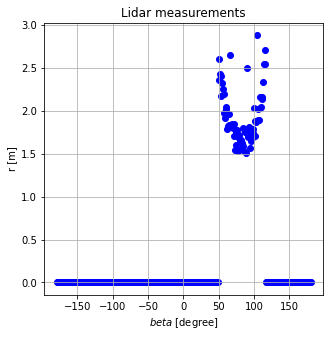

In [6]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

#Plot
plt.figure(figsize=(5,5))
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();



**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data, 
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y_n = \theta_0 + \theta_1 x_n } 
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



-1.4592143259866275 -3.5752409520243704


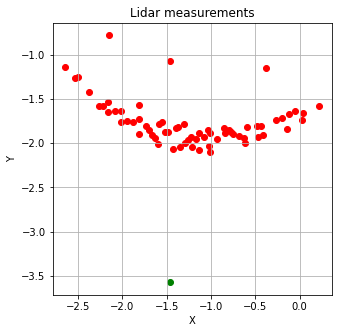

In [7]:
# Part 2.1.1

#To complete

rt = Lidar_range[t]
beta = np.deg2rad(angle)

#Build the cloud points in 2D plan
x_o, y_o = [], []

#t=5*10   # t = 5 sec * 1/sample_time


#Create 2 arrays with the robot x an y coordinates of Part 1
for i in range(len(Lidar_range[t])):
  if rt[i] > 0:
    x0 = robot_dx_time[50] + rt[i] * cos(beta[i])
    y0 = robot_dy_time[50] + rt[i] * sin(beta[i])
    x_o.append(x0)   #add to the x_o vector the x0 value
    y_o.append(y0)   #add to the y_o vector the y0 value

#Plot of the obstacle and robot position t=5s
plt.figure(figsize=(5,5))
plt.scatter(x_o, y_o, color='r')
plt.scatter(robot_dx_time[50], robot_dy_time[50], color='g')    #local of robot for t=5s
plt.title('Lidar measurements')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid();

print(robot_dx_time[50], robot_dy_time[50])

Linear Regression 
 
Parameters theta: [[-1.91334459]
 [-0.12289806]]


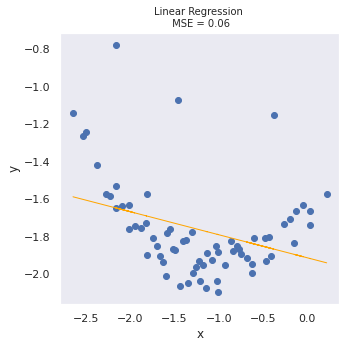


Confirmation with Sklearn 

Intercept =  -1.9133445893528438
Coef = [-0.12289806]


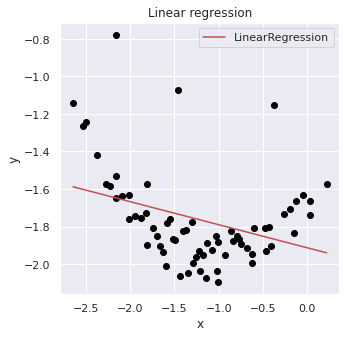

In [8]:
# Part 2.1.2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

#Adjust and measure the X coordinates matrix
X = np.array(x_o).reshape(-1,1)
X1 = np.ones((len(X), 1), dtype=float)
X = np.concatenate((X1, X), axis = -1)

#Adjust and measure the Y coordinates matrix
Y = np.array(y_o).reshape(-1,1)

print("Linear Regression \n ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = inv(X.T @ X)
theta = theta @ X.T 
theta = theta @ Y
#theta_2_1_2 = theta

print("Parameters theta:", theta)

# SVD of the matrix (X.t X)
M = X.T@X

u, s, vh = np.linalg.svd(M, full_matrices=True)
#print("SVD:", s )
 
# Precticted values
Y_predict = X @ theta

#Model's error
MSE = mean_squared_error(Y, Y_predict)


#Plot
plt.figure(figsize=(5,5))
plt.scatter(x_o, Y, color="b")
plt.plot(x_o, Y_predict,  color="orange", linewidth=1)
plt.grid()

title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression \n " + title, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


########################### This use the sklearn function to validate the values above ##########################
# With Sklearn
x = np.array(x_o)
y = np.array(y_o)
model = LinearRegression(fit_intercept=True)

# Fit model based on data
x1= model.fit(x[:, np.newaxis], y)

print("\nConfirmation with Sklearn \n")
print("Intercept = ", model.intercept_)
print("Coef =", model.coef_)

# Data for the line
xfit = np.linspace(np.ndarray.min(x), np.ndarray.max(x), 500)

# Use the model
yfit = model.predict(xfit[:, np.newaxis])

#Plot
plt.figure(figsize=(5,5))
plt.scatter(x, y, color='black')
plt.plot(xfit, yfit, 'r', label='LinearRegression');
plt.legend()
plt.title('Linear regression');
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**2.2**
Do the same as the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y_n = \theta_0 + \theta_1 x_n + \theta_2 x^2_n } 
 \end{equation}



Linear Regression
Parameters theta = [[-1.63162255]
 [ 0.57852559]
 [ 0.28829671]]
MSE: 0.0317


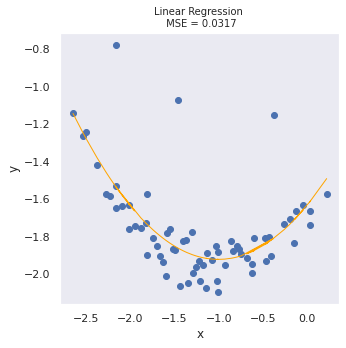


Confirmation with Sklearn 

MSE: 0.0317
Intercept: [-1.63162255] 
Coefs:  [[0.         0.57852559 0.28829671]]


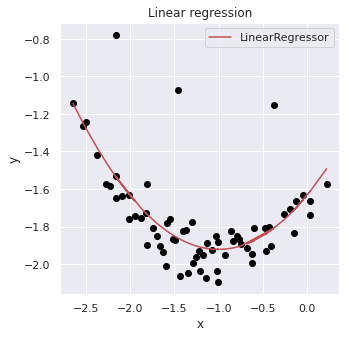

In [9]:
# Part 2.2

# To complete
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#To complete

#Adjust and measure the X coordinates matrix
x = np.array(x_o).reshape(-1,1)
x_square = x**2
X = np.ones((len(x), 1), dtype=float)
X = np.concatenate((X, x), axis = -1)
X = np.concatenate((X, x_square), axis = -1)

#Adjust and measure the Y coordinates matrix
Y =  np.array(y_o).reshape(-1,1)

print("Linear Regression")

# Normal Equation: (X.t X)^-1 X.t Y 
theta = np.linalg.inv(X.T@X)@X.T@Y

print("Parameters theta =", theta)

# SVD of the matrix (X.t X)
M = X.T@X

u, s, vh = np.linalg.svd(M, full_matrices=True)
#print("SVD:", s )
 
# Precticted values
Y_predict = X @ theta

#Model's error
MSE = mean_squared_error(Y, Y_predict)

print("MSE:", round(MSE,4))


#Plot
plt.figure(figsize=(5,5))
plt.scatter(x_o, Y, color="b")
plt.plot(x_o, Y_predict,  color="orange", linewidth=1)
plt.grid()

title = 'MSE = {}'.format(round(MSE,4))
plt.title("Linear Regression \n " + title, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


########################### This use the sklearn function to validate the values above ##########################


# Linear Regression Model using the pipeline bib of Sklearn(Chosen bib, very useful to plot functions with degree bigger then 1)
X = np.array(x_o).reshape(-1,1)
Y =  np.array(y_o).reshape(-1,1)

#Function Degree
nb_degree = 2

#Inicitalization of the necessary instance to the bib through the PolynomialFeatures bib
fit_values = [('polynomial_features', PolynomialFeatures(degree = nb_degree)), ('model', LinearRegression())]         

# Pipeline bib
Fitting = Pipeline(fit_values)

# Fit model based on data
Fitting.fit(X, Y)

# Use the model
Y_Predict = Fitting.predict(X)

print("\nConfirmation with Sklearn \n")

# The mean squared error, intercept and coeficients
print("MSE:", round(mean_squared_error(Y, Y_Predict),4))
print("Intercept:", Fitting.named_steps['model'].intercept_, "\nCoefs: ", Fitting.named_steps['model'].coef_)

#Plot
plt.figure(figsize=(5,5))
plt.scatter(X, Y, color='black')
plt.plot(X, Y_Predict, color = 'r', label='LinearRegressor')
plt.legend()
plt.title('Linear regression');
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**2.3**
At this point you can use sklearn! 
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?





Sklearn Results

MSE: 0.0174
Intercept: [0.73434485] 
Coefs:  [[ 0.00000000e+00 -5.13675765e+00  7.60658212e+01 -6.13470594e+02
   2.22652037e+03 -3.13582429e+03 -2.19657284e+03  1.35596985e+04
  -1.86521970e+04  1.14589345e+04 -2.71835736e+03]]


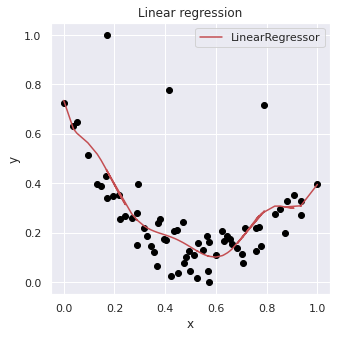


RIDGE results
Training MSE (Ridge Model): 0.01
Testing MSE (Ridge Model): 0.05
Intercept: [0.58300736] 
Coefs:  [[ 0.         -1.03705431  0.03613721  0.38563093  0.39559347  0.28787687
   0.15483179  0.03123554 -0.07182421 -0.15275774 -0.21356672]]


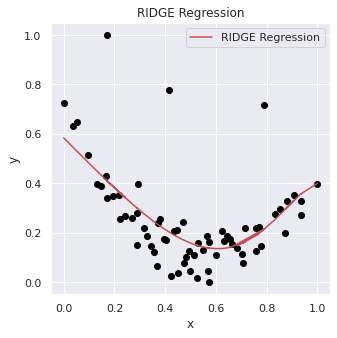


LASSO results
Training MSE (Lasso Model): 0.00
Testing MSE (Lasso Model): 0.05
Intercept: [0.63886677] 
Coefs:  [ 0.         -1.30564855  0.          1.28063659  0.          0.
 -0.         -0.         -0.         -0.         -0.2097558 ]


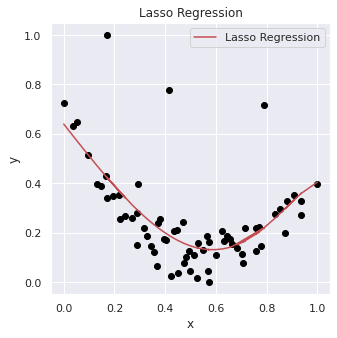


Model_Sklearn:  [0.73434485] [[ 0.00000000e+00 -5.13675765e+00  7.60658212e+01 -6.13470594e+02
   2.22652037e+03 -3.13582429e+03 -2.19657284e+03  1.35596985e+04
  -1.86521970e+04  1.14589345e+04 -2.71835736e+03]]

Model_Ridge:  [0.58300736] [[ 0.         -1.03705431  0.03613721  0.38563093  0.39559347  0.28787687
   0.15483179  0.03123554 -0.07182421 -0.15275774 -0.21356672]]

Model_Lasso:  [0.63886677] [ 0.         -1.30564855  0.          1.28063659  0.          0.
 -0.         -0.         -0.         -0.         -0.2097558 ]


In [10]:
# Part 2.3
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

# With Sklearn
# Linear Regression Model using the pipeline bib of Sklearn(Chosen bib, very useful to plot functions with degree bigger then 1)

#Function Degree
grau = 10

# #Adjust and measure the X and Y coordinates matrix
X = np.array(x_o).reshape(-1,1)
Y = np.array(y_o).reshape(-1,1)

#Data normalization
scaler_x = MinMaxScaler()   
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)

#Inicitalization of the necessary instance to the bib through the PolynomialFeatures bib
fit_values = [('polynomial_features', PolynomialFeatures(degree = grau)), ('model', LinearRegression())]

# Pipeline bib
Fitting = Pipeline(fit_values)

# Fit model based on data
Fitting.fit(X, Y)

# Use the model
Y_Predict = Fitting.predict(X)

print("\nSklearn Results\n")

# The mean squared error, intercept and coeficients
print("MSE:", round(mean_squared_error(Y, Y_Predict),4))
print("Intercept:", Fitting.named_steps['model'].intercept_, "\nCoefs: ", Fitting.named_steps['model'].coef_)
#print("Com Numpy: \n", np.flip(np.polyfit(x_o,y_o,grau)))

#Plot
plt.figure(figsize=(5,5))
plt.scatter(X, Y, color='black')
plt.plot(X, Y_Predict, color = 'r', label='LinearRegressor')
plt.legend()
plt.title('Linear regression');
plt.xlabel('x')
plt.ylabel('y')
plt.show()


################################ This compare the Lasso and Ridge Model of degree = 10 or 1 ##################################################
#print(" Parameters theta =\n", theta_2_1_2)


grau = 10 # ou 1

#Chosen bib to fit the values to the Lasso and Ridge model
polynomial_features = PolynomialFeatures(degree = grau)
X_TRANSF = polynomial_features.fit_transform(X)

#GRAU 1
#X_change = X


#GRAU 10
X_change = X_TRANSF

#########################################################
###################### Ridge ############################
#########################################################

X_train, X_test, Y_train, Y_test = train_test_split(X_change, Y, test_size=0.3, random_state=42)
model_ridge = Ridge(alpha=0.1)

# Fit model based on data
model_ridge.fit(X_change, Y)

# Use the Ridge model
yfit_ridge = model_ridge.predict(X_test)
Ridge_Values = model_ridge.predict(X_change)


print("\nRIDGE results")

# The mean squared error, intercept and coeficients
print("Training MSE (Ridge Model): %.2f" % mean_squared_error(Y_train, model_ridge.predict(X_train)))
print("Testing MSE (Ridge Model): %.2f" % mean_squared_error(Y_test, yfit_ridge))

# Show model
print("Intercept:", model_ridge.intercept_ ,"\nCoefs: ", model_ridge.coef_)

#Plot
plt.figure(figsize=(5,5))
plt.scatter(X, Y, color='black')
plt.plot(X, Ridge_Values, color = 'r', label='RIDGE Regression')
plt.legend()
plt.title('RIDGE Regression');
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#########################################################
###################### Lasso ############################
#########################################################

X_train, X_test, Y_train, Y_test = train_test_split(X_change, Y, test_size=0.3, random_state=42)
model_lasso = Lasso(alpha=0.0005)

# Fit model based on data
model_lasso.fit(X_change, Y)

# Use the Lasso model
yfit_lasso  = model_lasso.predict(X_test)
Lasso_values = model_lasso.predict(X_change)


print("\nLASSO results")

# The mean squared error, intercept and coeficients
print("Training MSE (Lasso Model): %.2f" % mean_squared_error(Y_train, model_lasso.predict(X_train)))
print("Testing MSE (Lasso Model): %.2f" % mean_squared_error(Y_test, yfit_lasso))

# Show model
print("Intercept:", model_lasso.intercept_, "\nCoefs: ",  model_lasso.coef_)

#Plot
plt.figure(figsize=(5,5))
plt.scatter(X, Y, color='black')
plt.plot(X, Lasso_values, color = 'r', label='Lasso Regression')
plt.legend()
plt.title('Lasso Regression');
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#########################################################
################## Comparing Results ####################
#########################################################
print("\nModel_Sklearn: ", Fitting.named_steps['model'].intercept_, Fitting.named_steps['model'].coef_)
print("\nModel_Ridge: ", model_ridge.intercept_, model_ridge.coef_)
print("\nModel_Lasso: ", model_lasso.intercept_, model_lasso.coef_)

**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for 
$\color{green} \theta$.



Sklearn Results

MSE: 0.0054
Intercept: [0.330084] 
Coefs:  [[ 0.00000000e+00  8.78581372e-02  4.20664739e+01 -7.60928254e+02
   5.27516812e+03 -1.97907361e+04  4.46149983e+04 -6.21806107e+04
   5.24673626e+04 -2.45619816e+04  4.89478127e+03]]


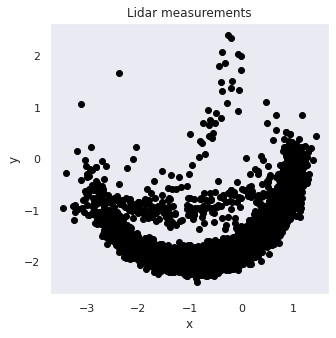

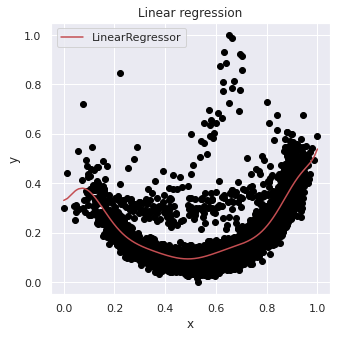


RIDGE results
Training MSE (Ridge Model): 0.0050
Testing MSE (Ridge Model): 0.0067
Intercept: [0.43244673] 
Coefs:  [[ 0.         -1.18918382  0.72051476  0.62322832  0.12143475 -0.15462025
  -0.18271538 -0.08234249  0.0421379   0.12968642  0.154583  ]]


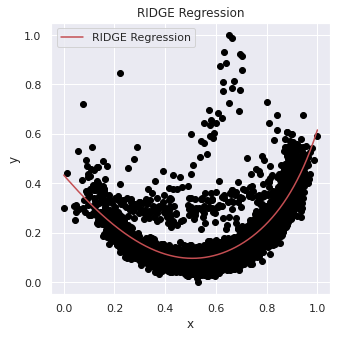


LASSO results
Training MSE (Lasso Model): 0.0050
Testing MSE (Lasso Model): 0.0068
Intercept: [0.4180613] 
Coefs:  [ 0.00000000e+00 -1.13780838e+00  8.07875482e-01  3.23973558e-01
  8.03392546e-02  2.24725617e-03  0.00000000e+00  2.99581750e-04
  2.30103783e-02  3.40507832e-02  3.87670195e-02]


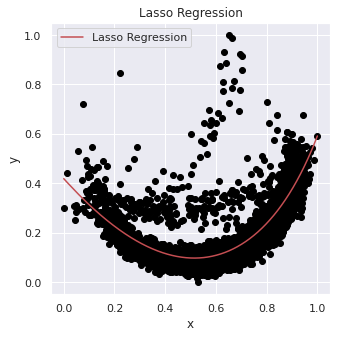


Model_Sklearn:  [0.330084] [[ 0.00000000e+00  8.78581372e-02  4.20664739e+01 -7.60928254e+02
   5.27516812e+03 -1.97907361e+04  4.46149983e+04 -6.21806107e+04
   5.24673626e+04 -2.45619816e+04  4.89478127e+03]]

Model_Ridge:  [0.43244673] [[ 0.         -1.18918382  0.72051476  0.62322832  0.12143475 -0.15462025
  -0.18271538 -0.08234249  0.0421379   0.12968642  0.154583  ]]

Model_Lasso:  [0.4180613] [ 0.00000000e+00 -1.13780838e+00  8.07875482e-01  3.23973558e-01
  8.03392546e-02  2.24725617e-03  0.00000000e+00  2.99581750e-04
  2.30103783e-02  3.40507832e-02  3.87670195e-02]


In [11]:
# Part 2.4 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

#To complete

xo, yo = [], []
Beta = np.deg2rad(angle)

#Create 2 arrays with the robot x an y coordinates of Part 1 for every value of t
for j in range(100):
  for i in range(len(Lidar_range[j*5])):
    rt = Lidar_range[j*5]
    if rt[i] > 0:
      x0 = robot_dx_time[j*5] + rt[i] * cos(Beta[i])
      y0 = robot_dy_time[j*5] + rt[i] * sin(Beta[i])
      xo.append(x0)
      yo.append(y0)
      
# Setting arrays order
for j in range(len(xo)-1):
  for w in range(len(xo)-1):
    if xo[w] > xo[w+1]:
      aux_x = xo[w+1]
      aux_y = yo[w+1]
      xo[w+1] = xo[w]
      yo[w+1] = yo[w]
      xo[w] = aux_x
      yo[w] = aux_y


#Plot the total data set
plt.figure(figsize=(5,5))
plt.scatter(xo, yo, color='black')
plt.title('Lidar measurements')
plt.ylabel('y')
plt.xlabel('x')
plt.grid();



#Fucntion Degree
grau = 10


########################### This use the sklearn function to validate the values above ##########################
# Linear Regression Model using the pipeline bib of Sklearn(Chosen bib, very useful to plot functions with degree bigger then 1)

#Adjust and measure the X and Y coordinates matrix
X = np.array(xo).reshape(-1,1)
Y = np.array(yo).reshape(-1,1)

#Data normalization
scaler_x = MinMaxScaler()   
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)
#print(X)
#print(Y)

#Inicitalization of the necessary instance to the bib through the PolynomialFeatures bib
fit_values = [('polynomial_features', PolynomialFeatures(degree = grau)), ('model', LinearRegression())]

#Pipeline Bib
Fitting = Pipeline(fit_values)

# Fit model based on data
Fitting.fit(X, Y)

# Use the model
Y_Predict = Fitting.predict(X)

print("\nSklearn Results\n")

# The mean squared error, intercept and coeficients
print("MSE:", round(mean_squared_error(Y, Y_Predict), 4))
print("Intercept:", Fitting.named_steps['model'].intercept_, "\nCoefs: ", Fitting.named_steps['model'].coef_)
#print("Com Numpy:", "\nIntercept:", [round(np.flip(np.polyfit(xo,yo,grau))[0], 8)], "\nCoefs: ", np.flip(np.polyfit(xo,yo,grau))[1:])

#Plot
plt.figure(figsize=(5,5))
plt.scatter(X, Y, color='black')
plt.plot(X, Y_Predict, color = 'r', label='LinearRegressor')
plt.legend()
plt.title('Linear regression');
plt.xlabel('x')
plt.ylabel('y')
plt.show()



#########################################################################################################################################################
#Chosen bib to fit the values to the Lasso and Ridge model

polynomial_features = PolynomialFeatures(degree = grau)
X_TRANSF = polynomial_features.fit_transform(X)


X_new = X_TRANSF

#########################################################
###################### Ridge ############################
######################################################### 

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.3, random_state=42)
model_ridge = Ridge(alpha=0.1)

# Fit model based on data
model_ridge.fit(X_new, Y)

# Use the Ridge model
yfit_ridge = model_ridge.predict(X_test)
Ridge_Values = model_ridge.predict(X_new)

print("\nRIDGE results")

# The mean squared error, intercept and coeficients
print("Training MSE (Ridge Model): %.4f" % mean_squared_error(Y_train, model_ridge.predict(X_train)))
print("Testing MSE (Ridge Model): %.4f" % mean_squared_error(Y_test, yfit_ridge))

# Show model
print("Intercept:", model_ridge.intercept_ ,"\nCoefs: ", model_ridge.coef_)

#Plot
plt.figure(figsize=(5,5))
plt.scatter(X, Y, color='black')
plt.plot(X, Ridge_Values, color = 'r', label='RIDGE Regression')
plt.legend()
plt.title('RIDGE Regression');
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#########################################################
###################### Lasso ############################
######################################################### 

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.3, random_state=42)
model_lasso = Lasso(alpha=0.00001, tol=0.1) # aumentou-se a tolerancia para que os dados não entrem em divergência

# Fit model based on data
model_lasso.fit(X_new, Y)

# Use the Lasso model
yfit_lasso  = model_lasso.predict(X_test)
Lasso_values = model_lasso.predict(X_new)

print("\nLASSO results")

# The mean squared error, intercept and coeficients
print("Training MSE (Lasso Model): %.4f" % mean_squared_error(Y_train, model_lasso.predict(X_train)))
print("Testing MSE (Lasso Model): %.4f" % mean_squared_error(Y_test, yfit_lasso))

# Show model
print("Intercept:", model_lasso.intercept_, "\nCoefs: ",  model_lasso.coef_)

#Plot
plt.figure(figsize=(5,5))
plt.scatter(X, Y, color='black')
plt.plot(X, Lasso_values, color = 'r', label='Lasso Regression')
plt.legend()
plt.title('Lasso Regression');
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#########################################################
################## Comparing Results ####################
#########################################################

print("\nModel_Sklearn: ", Fitting.named_steps['model'].intercept_, Fitting.named_steps['model'].coef_)
print("\nModel_Ridge: ", model_ridge.intercept_, model_ridge.coef_)
print("\nModel_Lasso: ", model_lasso.intercept_, model_lasso.coef_)

**2.5 (Extra)** 
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).


SGDRegressor

Model Slope:     0.20632785704507273
Model Intercept: [0.04922196]

Linear Regression

Model Slop = 0.20961800409008313
Model Intercept =  0.046870724782260315


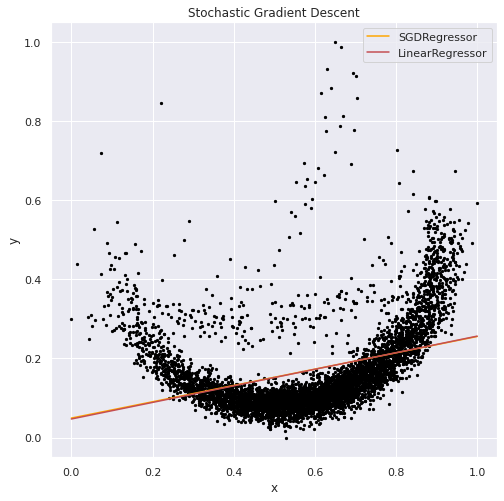

In [12]:
# Part 2.5
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

#Constant Value
gamma = 0.001
iteracoes = 500

#Adjust and measure the X coordinates matrix
X1=np.array([xo]).T
Y1=np.array([yo]).T
X_train = np.ones((len(X1), 1), dtype=float)
X_train = np.concatenate((X_train, X1), axis=1)


#Adjust the Y coordinates matrix
Y_train = Y1[:, -1].reshape((len(xo), 1))

#Data Normalization
scaler_x = MinMaxScaler()   
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X_train)
Y = scaler_y.fit_transform(Y_train)


#Regression using Descendent Gradient method
model_sgd = SGDRegressor(learning_rate='constant', eta0 = gamma, alpha=0, early_stopping=False, max_iter=iteracoes, tol=1e-9)

#Adjust X matrix
X = X[:, 1:]

#Number of samples
n_samples = X.shape[0]


# Fit model based on data
model_sgd.fit(X , Y.reshape(n_samples))

# Use the model
yfit_sgd = model_sgd.predict(X)

print("\nSGDRegressor\n")

# The intercept and coeficient
print("Model Slope:    ", model_sgd.coef_[0])
print("Model Intercept:", model_sgd.intercept_)



################################################### Linear Regression ##################################################################
x = np.array(xo).reshape(-1,1)
y = np.array(yo).reshape(-1,1)

# scaler for normalization
scaler_x = MinMaxScaler()   
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

model = LinearRegression()
x = x[:,]
n_samples = x.shape[0]

model.fit(x , y.reshape(n_samples))
yfit = model.predict(x)


print("\nLinear Regression\n")

# The intercept and coeficient
print("Model Slop =", model.coef_[0])
print("Model Intercept = ", model.intercept_)
########################################################################################################################################

#Plot
plt.figure(figsize=(8,8))
plt.scatter(x, y,color='black',s=5)
plt.plot(x, yfit_sgd, 'orange', label='SGDRegressor')
plt.plot(x, yfit, 'r', label='LinearRegressor')
plt.legend()
plt.title('Stochastic Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
